In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=8,6
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.listdir()

['.config', 'train (1).csv', 'sample_data']

In [4]:
df=pd.read_csv('train (1).csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.shape

(891, 12)

In [6]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='mean')
df[['Age']]=si.fit_transform(df[['Age']])

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [17]:
si2=SimpleImputer(strategy='most_frequent')
df[['Embarked']]=si2.fit_transform(df[['Embarked']])

In [19]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


# EDA


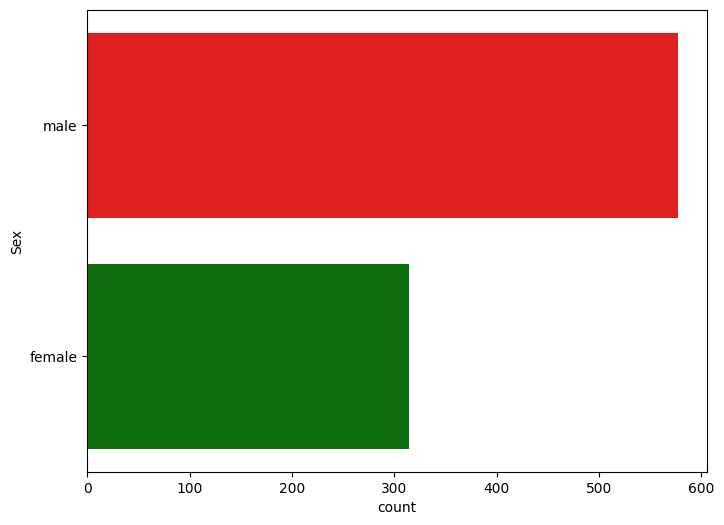

In [21]:
sns.countplot(df['Sex'],palette=['red','green'])
plt.show()

In [26]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

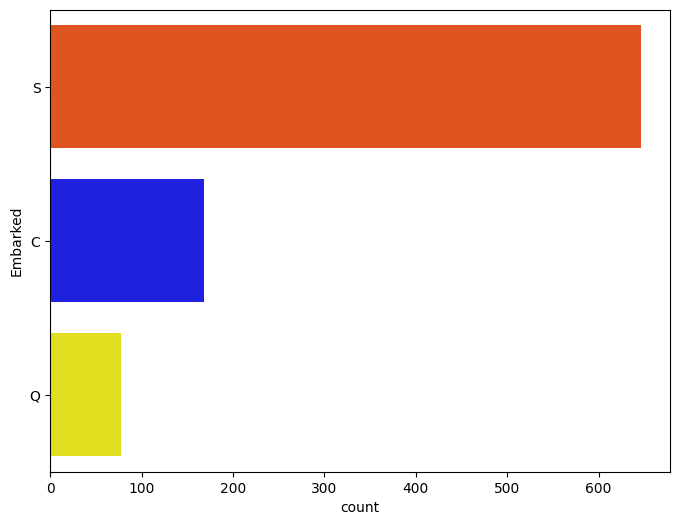

In [30]:
sns.countplot(df['Embarked'],palette=['orangered','blue','yellow'])
plt.show()

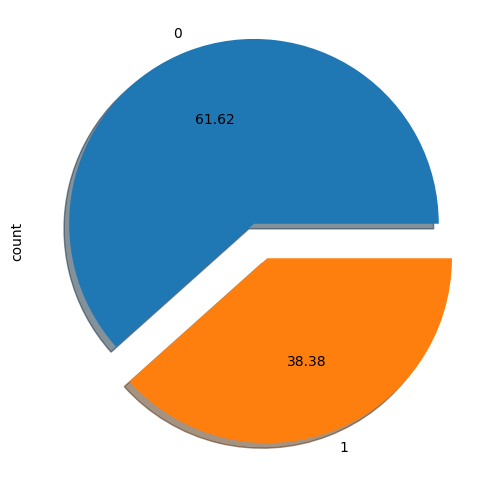

In [35]:
df['Survived'].value_counts().plot(kind='pie',shadow=True,autopct='%.2f',explode=[0.1,0.1])
plt.xlabels()
plt.show()

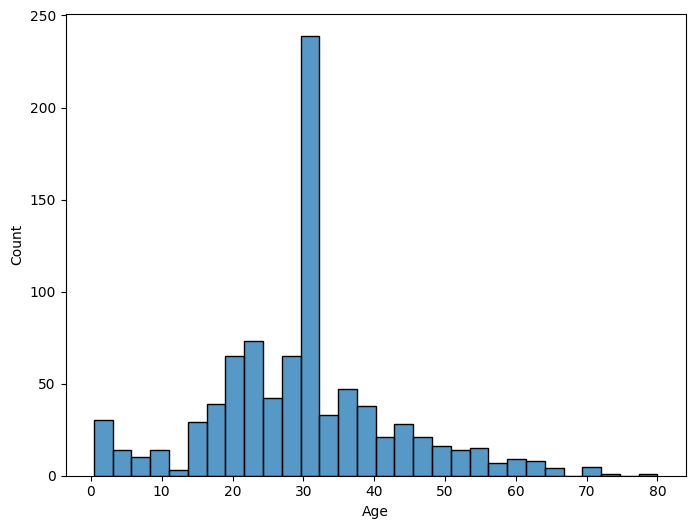

In [37]:
sns.histplot(df['Age'])
plt.show()

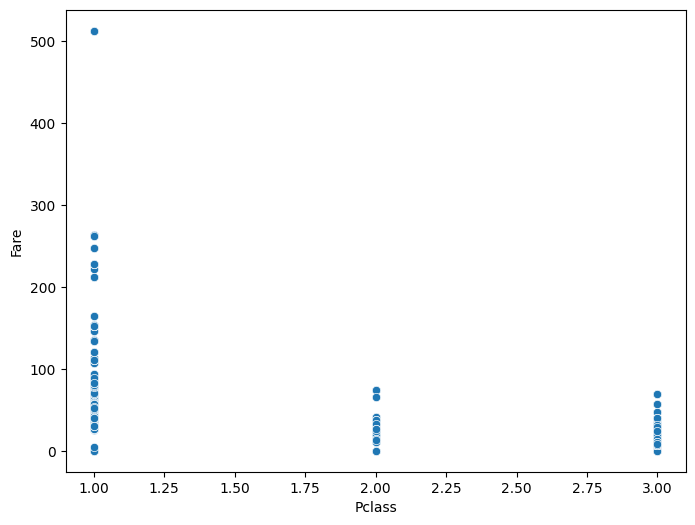

In [44]:
sns.scatterplot(x=df['Pclass'],y=df['Fare'],data=df)
plt.show()

In [45]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

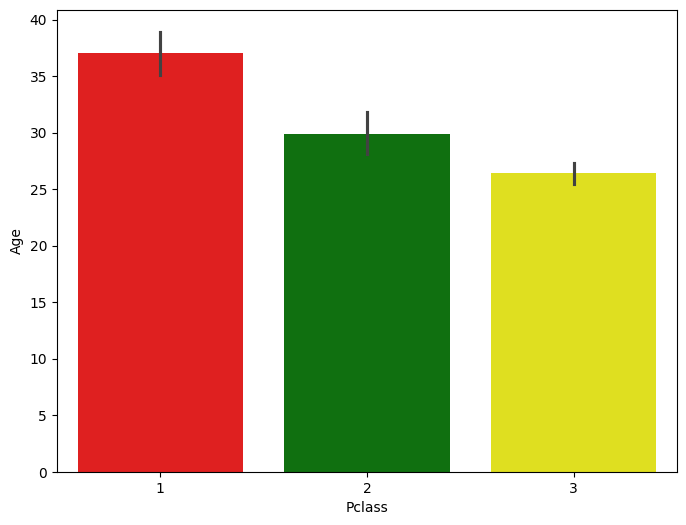

In [48]:
sns.barplot(x=df['Pclass'],y=df['Age'],data=df,palette=['red','green','yellow'])
plt.show()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


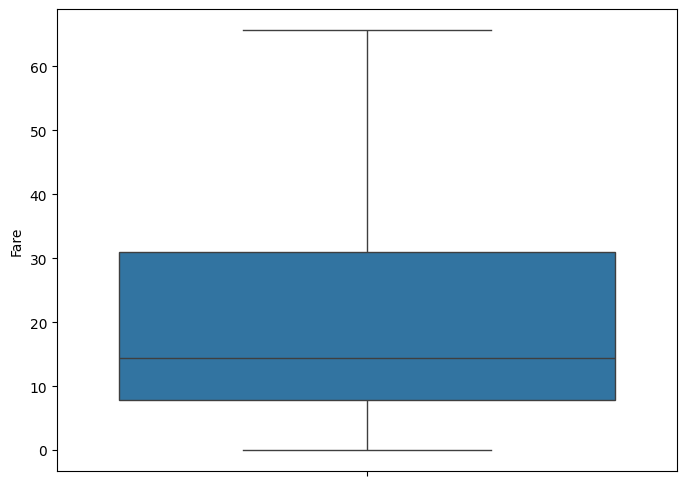

In [64]:
sns.boxplot(df['Fare'])
plt.show()

In [63]:
percentile25=df['Fare'].quantile(0.25)
percentile75=df['Fare'].quantile(0.75)
iqr=percentile75-percentile25

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

#Finding Outliers
df[df['Fare']<lower_limit]
df[df['Fare']>upper_limit]
df['Fare']=np.where(
    df['Fare']>upper_limit,
    upper_limit,
    np.where(
        df['Fare']<lower_limit,
        lower_limit,
        df['Fare']
    )
)

In [60]:
percentile25=df['Parch'].quantile(0.25)
percentile75=df['Parch'].quantile(0.75)
iqr=percentile75-percentile25

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

#Finding Outliers
df[df['Parch']<lower_limit]
df[df['Parch']>upper_limit]
df['Parch']=np.where(
    df['Parch']>upper_limit,
    upper_limit,
    np.where(
        df['Parch']<lower_limit,
        lower_limit,
        df['Parch']
    )
)

In [56]:
percentile25=df['SibSp'].quantile(0.25)
percentile75=df['SibSp'].quantile(0.75)
iqr=percentile75-percentile25

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

#Finding Outliers
df[df['SibSp']<lower_limit]
df[df['SibSp']>upper_limit]
df['SibSp']=np.where(
    df['SibSp']>upper_limit,
    upper_limit,
    np.where(
        df['SibSp']<lower_limit,
        lower_limit,
        df['SibSp']
    )
)

In [57]:
percentile25=df['Age'].quantile(0.25)
percentile75=df['Age'].quantile(0.75)
iqr=percentile75-percentile25

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

#Finding Outliers
df[df['Age']<lower_limit]
df[df['Age']>upper_limit]
df['Age']=np.where(
    df['Age']>upper_limit,
    upper_limit,
    np.where(
        df['Age']<lower_limit,
        lower_limit,
        df['Age']
    )
)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 55.8+ KB


In [66]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

Axes(0.125,0.11;0.775x0.77)


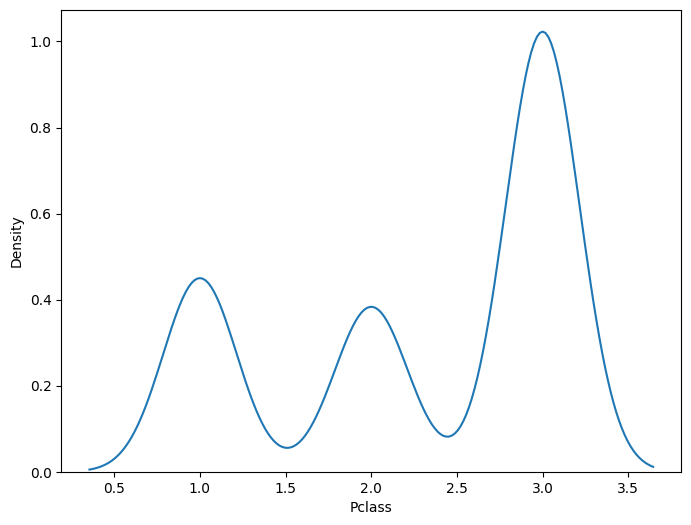

Axes(0.125,0.11;0.775x0.77)


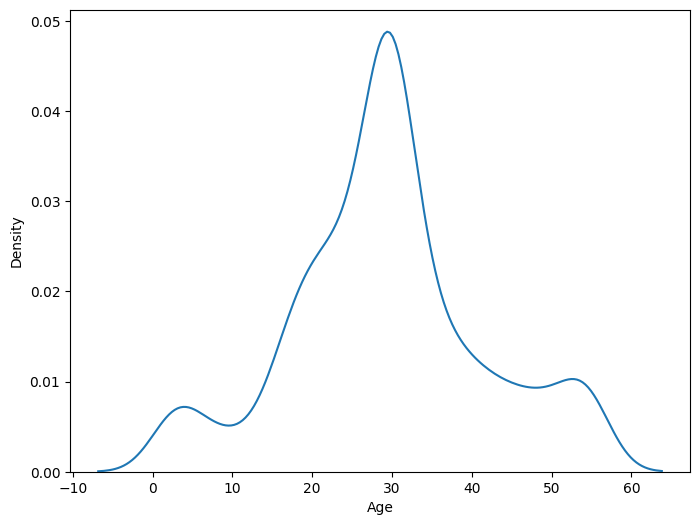

Axes(0.125,0.11;0.775x0.77)


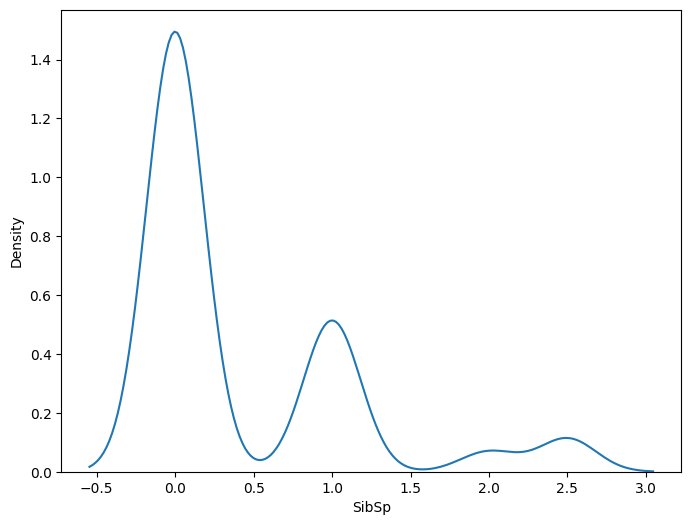

Axes(0.125,0.11;0.775x0.77)


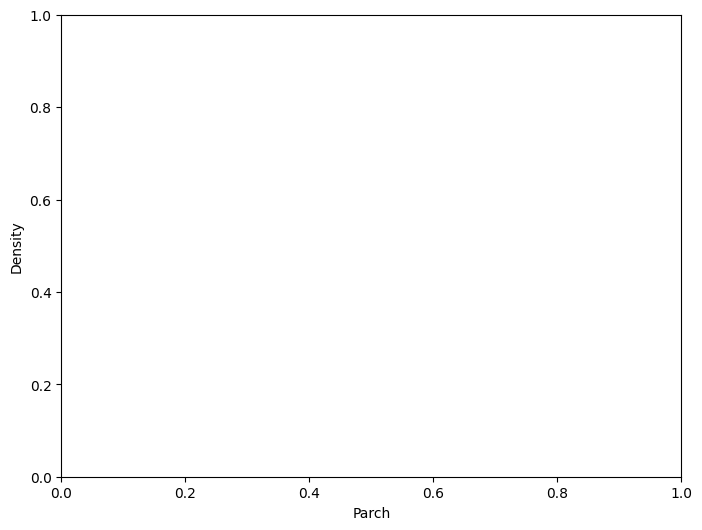

Axes(0.125,0.11;0.775x0.77)


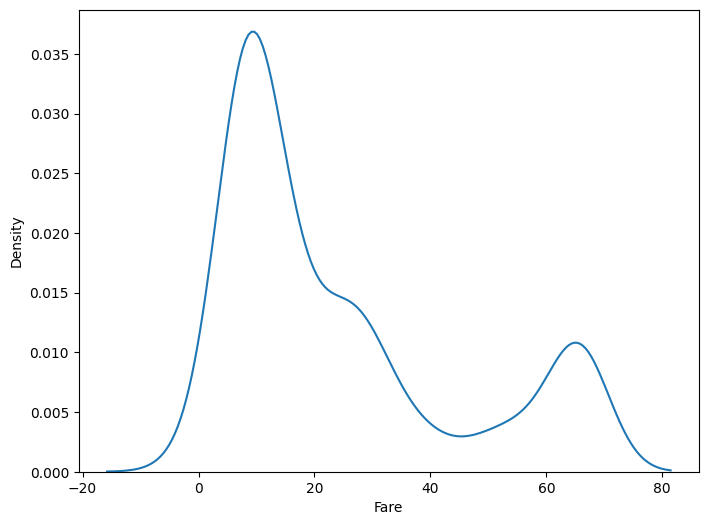

In [68]:
for i in df[['Pclass','Age', 'SibSp', 'Parch', 'Fare']]:
  print(sns.kdeplot(df[i]))
  plt.show()

In [73]:
for i in df[['Pclass','Age', 'SibSp', 'Parch', 'Fare']]:
  print(df[i].skew())
  plt.show()

-0.4414377065902575
-0.016695825238387352
0.7980299659834778
0.0
0.002966818358326957


In [70]:
from sklearn.preprocessing import PowerTransformer

In [72]:
pt=PowerTransformer(method='yeo-johnson')
df[['Pclass','Age', 'SibSp', 'Parch', 'Fare']]=pt.fit_transform(df[['Pclass','Age', 'SibSp', 'Parch', 'Fare']])

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 55.8+ KB


In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])

In [76]:
df['Sex']=le.fit_transform(df['Sex'])

In [77]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [81]:
y_pred=lr.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
ac

0.8044692737430168

In [89]:
from sklearn.model_selection import cross_val_score
x=cross_val_score(lr,x,y,cv=10)
print(np.mean(x))

0.7957428214731584


In [85]:
y_train_pred = lr.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy

0.7963483146067416

In [87]:
from sklearn import metrics

In [88]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



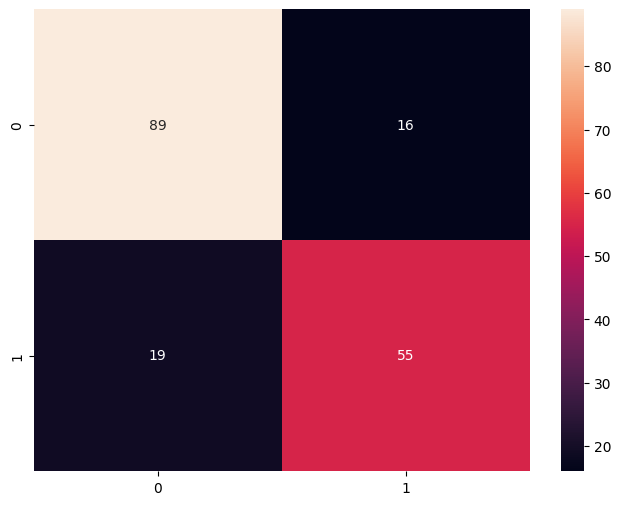

In [97]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)
plt.show()

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [162]:
dtc=DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=10,min_samples_leaf=10,max_features="sqrt",random_state=42)
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
ac=accuracy_score(y_pred,y_test)
ac

0.7932960893854749

In [163]:
m=cross_val_score(dtc,df.drop(['Survived'],axis=1),df['Survived'],cv=10) # Use the original dataframe features (df.drop(['Survived'],axis=1)) and target (df['Survived']) for cross-validation.
print(np.mean(m))

0.804681647940075


In [164]:
y_train_pred = dtc.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy

0.8174157303370787

In [153]:
from sklearn.model_selection import GridSearchCV
grid=dict()
grid['criterion']=['gini','entropy']
grid['max_depth']=[5,10,7,8,9,15,12,20,3,4]
grid['min_samples_split']=[10,20,100,50,30,15,18,25]
grid['min_samples_leaf']=[10,20,100,50,30,15,18,25]
grid['max_features']=['sqrt','log2']
grid_search=GridSearchCV(estimator=dtc,param_grid=grid,cv=10,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 50}

In [160]:
dtc=DecisionTreeClassifier(criterion="gini",max_depth=7,min_samples_split=50,min_samples_leaf=15,max_features="sqrt",random_state=42)
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
ac=accuracy_score(y_pred,y_test)
ac

0.7932960893854749

In [161]:
n=cross_val_score(dtc,df.drop(['Survived'],axis=1),df['Survived'],cv=10) # Use the original dataframe features (df.drop(['Survived'],axis=1)) and target (df['Survived']) for cross-validation.
print(np.mean(n))

0.7867415730337078


In [165]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



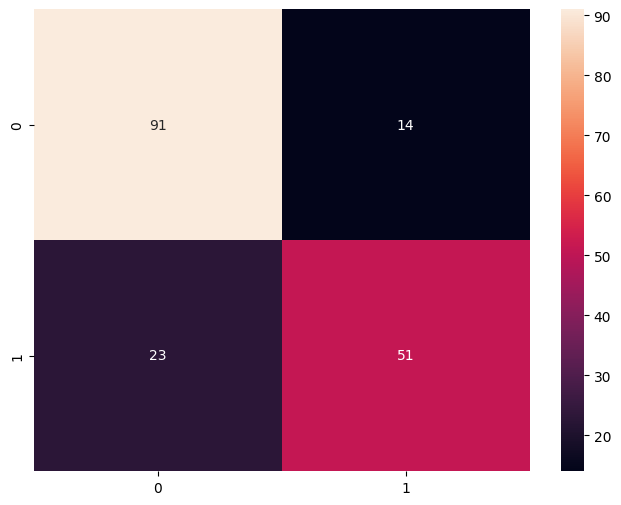

In [169]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)
plt.show()

# KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [157]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
ac=accuracy_score(y_pred,y_test)
ac

0.8379888268156425

In [158]:
m=cross_val_score(knn,df.drop(['Survived'],axis=1),df['Survived'],cv=10) # Use the original dataframe features (df.drop(['Survived'],axis=1)) and target (df['Survived']) for cross-validation.
print(np.mean(m))

0.8149188514357053


In [159]:
y_train_knn = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_knn)
train_accuracy

0.8609550561797753

In [170]:
from sklearn.model_selection import GridSearchCV
grid=dict()
grid['n_neighbors']=[3, 5, 7, 9, 11,10,8,7,4,15]
grid['weights']=['uniform', 'distance']
grid['metric']=['euclidean', 'manhattan', 'minkowski']
grid['p']=[1, 2]

grid_search=GridSearchCV(estimator=knn,param_grid=grid,cv=10,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}

In [173]:
knn=KNeighborsClassifier(metric='manhattan', n_neighbors=15, p =1, weights='uniform')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
ac=accuracy_score(y_pred,y_test)
ac

0.8044692737430168

In [174]:
n=cross_val_score(knn,df.drop(['Survived'],axis=1),df['Survived'],cv=10) # Use the original dataframe features (df.drop(['Survived'],axis=1)) and target (df['Survived']) for cross-validation.
print(np.mean(n))

0.8036704119850187


In [175]:
y_train_knn = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_knn)
train_accuracy

0.8202247191011236

In [176]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



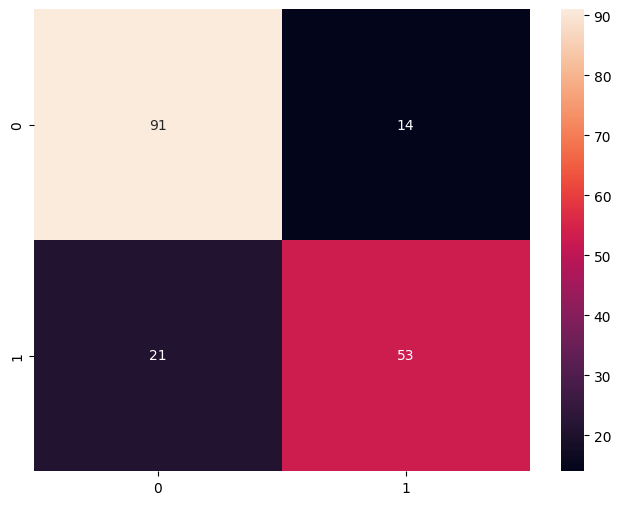

In [177]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)
plt.show()

# SVM

In [178]:
from sklearn.svm import SVC

In [179]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
ac=accuracy_score(y_pred,y_test)
ac

0.7932960893854749

In [186]:
n=cross_val_score(svc,df.drop(['Survived'],axis=1),df['Survived'],cv=10) # Use the original dataframe features (df.drop(['Survived'],axis=1)) and target (df['Survived']) for cross-validation.
print(np.mean(n))

0.819250936329588


In [187]:
y_train_knn = svc.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_knn)
train_accuracy

0.8300561797752809

In [188]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       105
           1       0.79      0.68      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



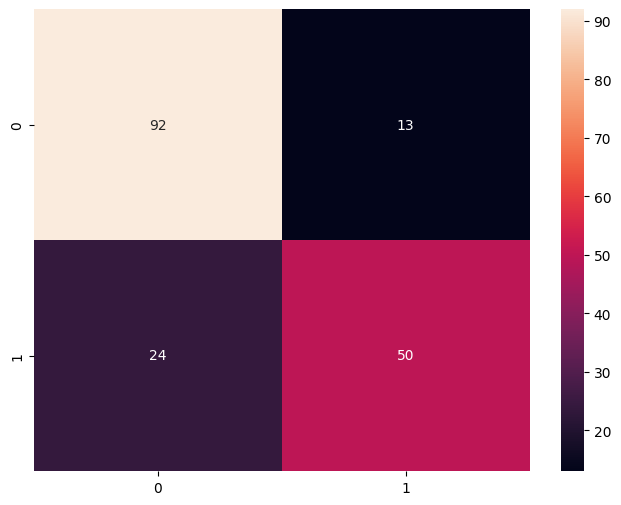

In [189]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)
plt.show()

# Random Forest Classifier

In [199]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
ac=accuracy_score(y_test,y_pred)
ac

0.8268156424581006

In [200]:
n=cross_val_score(rfc,df.drop(['Survived'],axis=1),df['Survived'],cv=10) # Use the original dataframe features (df.drop(['Survived'],axis=1)) and target (df['Survived']) for cross-validation.
print(np.mean(n))

0.8070411985018726


In [193]:
y_train_knn = rfc.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_knn)
train_accuracy

0.973314606741573